<h3>Chuẩn hóa dữ liệu tiếng việt -> đưa về dạng từ điển</h3>

In [26]:
import pandas as pd
import numpy as np

<h4>Đồng bộ unicode</h4>

In [27]:
import regex as re

def loaddicchar():
    dic = {}
    char1252 = 'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ'.split(
        '|')
    charutf8 = "à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ".split(
        '|')
    for i in range(len(char1252)):
        dic[char1252[i]] = charutf8[i]
    return dic
 
dicchar = loaddicchar()
 
# Đưa toàn bộ dữ liệu qua hàm này để chuẩn hóa lại
def convert_unicode(txt):
    return re.sub(
        r'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ',
        lambda x: dicchar[x.group()], txt)

<h4>Tokenize<h4>

In [28]:
from pyvi import ViTokenizer
from underthesea import word_tokenize

<h4>Remove HTML Code</h4>

In [29]:
def remove_html(txt):
    return re.sub(r'<[^>]*>', '', txt)

txt = "<p class=\"par\">bk hn test</p>"
remove_html(txt)

'bk hn test'

<h4>Clean Token</h4>

In [30]:
def clean_token(token):
    if(token == "k" or token == "ko" or token == "khong" or token == "kg"): return "không"
    if(token == "dc" or token == "đc"): return "được"
    if(token == "siu"): return "siêu"
    if(token == "cx"): return "cũng"
    if(token == "bt"): return "bình_thường"
    if(token == "iu"): return "yêu"
    if(token == 'i'): return "y"
    if(token == "oke" or token == "okie" or token =="okz"): return "ok"
    if(token == "xau"): return "xấu"
    if(token == "tks"): return "thanks"
    if(token == "dep"): return "đẹp"
    if(token == "tam"): return "tạm"
    if(token == "loi"): return "lỗi"
    if(token == "hai long"): return "hài_lòng"
    if(token == "tot"): return "tốt"

    return token

<h4>Remove stopwords<h4>

In [31]:

words =  pd.read_csv('./input/vietnamese-stopwords.txt', header = None)

stop_word = set(words.values.ravel())
final_stop_word = set()

for i in stop_word:
    a = i.replace(" ","_")
    final_stop_word.add(a)

def remove_stopwords(line):
    words = []
    for word in line.strip().split():
        if word not in final_stop_word:
            words.append(word)
    return ' '.join(words)


<h4>Xóa các kí tự thừa</h4>

In [32]:
def remove_redundant_character(document):
    
    document = re.sub(r'[^\s\wáàảãạăắằẳẵặâấầẩẫậéèẻẽẹêếềểễệóòỏõọôốồổỗộơớờởỡợíìỉĩịúùủũụưứừửữựýỳỷỹỵđ]',' ',document)
    document = re.sub("[0-9].kg", "", document) #remove cân nặng
    document = re.sub("[0-9].k", "", document) #remove giá tiền
    document = re.sub("[0-9]", "", document) #remove number
    cha = ('a','b','c','d','e','f','g','h','i','k','l','m','n','o','p','q','u','z','r','s')
    for i in cha:
        document = re.sub(f"{i}{i}*",f"{i}",document)
    return document

<h4>Đưa về dạng từ điển</h4>

In [33]:
def list_to_dict_tokens(cleaned_tokens):
        newDict = dict()

        for token in cleaned_tokens:
            if token in newDict:
                newDict[token] += 1
            else:
                newDict[token] = 1

        return newDict

<h3>Summary</h3>

In [34]:
def text_preprocess(document):
    # xóa html code
    document = remove_html(document)

    # chuẩn hóa unicode
    document = convert_unicode(document)

    # đưa về lower
    document = document.lower()

    # xóa các ký tự không cần thiết
    document = remove_redundant_character(document)

    # xóa khoảng trắng thừa
    document = re.sub(r'\s+', ' ', document).strip()

    # tokenize
    document = ViTokenizer.tokenize(document)
    document = word_tokenize(document)
    
    # clean tokens
    for i in range(0, len(document)):
        document[i] = clean_token(document[i])
    document = " ".join(str(e) for e in document)

    #remove stopwords
    document = remove_stopwords(document)

    # đưa về dạng từ điển
    # document = document.split(' ')
    # document = list_to_dict_tokens(document)
    
    return document

<h3>Process Train Data</h3>

In [35]:
df_raw = pd.read_csv('./input/dataVNese.csv', encoding = "UTF-8")

# lấy số lượng các câu ở mỗi label bằng nhau (4700 câu/1 label) #
df_raw.drop(df_raw.iloc[:, 3:], axis = 1, inplace = True)

df_raw_neg = df_raw[df_raw['label'] == 'NEG' ]
df_raw_neg = df_raw_neg.iloc[:4700]

df_raw_neu = df_raw[df_raw['label'] == 'NEU']

df_raw_4 = df_raw[df_raw['rate'] == 4]
df_raw_5 = df_raw[df_raw['rate'] == 5]

df_raw_4 = df_raw_4.iloc[:2350]
df_raw_5 = df_raw_5.iloc[:2350]

df_raw_pos = pd.concat([df_raw_4, df_raw_5])
dataraw_final = pd.concat([df_raw_neg, df_raw_neu, df_raw_pos])

dataraw_final = dataraw_final.sort_index()
dataraw_final


,comment,label,rate
0,Áo bao đẹp ạ!!,POS,5
1,Tuyệt vời !,POS,5
2,2day ao khong giong trong.,NEG,1
3,"Mùi thơm,bôi lên da mềm da.",POS,5
4,"Vải đẹp, dày dặn.",POS,5
...,...,...,...
31397,"áo mút mỏng, mặc đẹp, ngực nhỏ nên chọn size n...",NEU,3
31402,"Chưa dùng voucher chưa biết thế nào, thường đi...",NEU,3
31409,Mô tả của shop là dưới 55kg mặc được.,NEU,3
31415,Vải hơi cứng.,NEU,3


In [36]:
# xử lý dữ liệu train #
process_comment = []
comment = dataraw_final.comment
for item in comment:
    a = text_preprocess(item)
    process_comment.append(a)

list_tuples = list(zip(process_comment, dataraw_final.label)) 
processed_data = pd.DataFrame(list_tuples, columns = ['comment', 'label'])

x_train = processed_data['comment']
y_train = processed_data['label']

In [37]:

#lưu file x_train và y_train#
import pickle

# with open('x_train.pkl', 'wb') as f:
#      pickle.dump(x_train, f)
# with open('y_train.pkl', 'wb') as f:
#      pickle.dump(y_train, f)  

#save file for lib
with open('x_trainLib.pkl', 'wb') as f:
     pickle.dump(x_train, f)
with open('y_trainLib.pkl', 'wb') as f:
     pickle.dump(y_train, f)  

<h3>Process Test Data</h3>

In [38]:
data_test_raw = pd.read_csv('./input/test_concat.csv', encoding='utf-8')
data_test_raw.drop(data_test_raw.columns[2], axis= 1, inplace=True)

# Gán nhãn dữ liệu #
label = []
for item in data_test_raw['True_Label']:
    if(item == 5 or item == 4): 
        a = "POS"
        label.append(a)
    elif (item == 3):
        a = "NEU"
        label.append(a)
    else:
        a = "NEG"
        label.append(a)


data_test_raw['label'] = label

data_test_raw.drop(data_test_raw.columns[1], axis = 1, inplace = True)


In [39]:
# lấy số lượng câu ở mỗi nhãn là như nhau#
test_raw_neg = data_test_raw[data_test_raw['label'] == 'NEG' ]

test_raw_neu = data_test_raw[data_test_raw['label'] == 'NEU']

test_raw_pos = data_test_raw[data_test_raw['label'] == 'POS']

test_raw_pos = test_raw_pos.iloc[:705]
test_raw_neg = test_raw_neg.iloc[:705]

test_raw_final = pd.concat([test_raw_pos, test_raw_neu, test_raw_neg])

test_raw_final = test_raw_final.sort_index()
test_raw_final


,comment,label
0,"Hàng thì ok,nhưng giao k đúng màu đã đat.",NEU
1,Nhà vận chuyển giao hàng hơi lâu nhưng bù lại ...,POS
2,-Quần ngắn quá :(.,NEG
3,Hàng lỗi.,NEG
4,Sản phẩm tốt Thời gian giao hàng rất nhanh Chấ...,POS
...,...,...
4701,Sp đúng mô tả.,NEU
4703,Áo hơi nhỏ chất lượng in k đẹp lắm nhưng mà gi...,NEU
4710,"Dây nón bị tróc keo bong lên, k dán lại đc.",NEU
4713,Chất ổn so với giá.,NEU


In [40]:
# xử lý dữ liệu test#
test_comment = []
comment = test_raw_final.comment
for item in comment:
    a = text_preprocess(item)
    test_comment.append(a)

list_tuples2 = list(zip(test_comment, test_raw_final.label)) 
processed_data = pd.DataFrame(list_tuples2, columns = ['comment', 'label'])

x_test = processed_data['comment']
y_test = processed_data['label']


In [41]:

# lưu file x_test và y_test  #
import pickle
# with open('x_test.pkl', 'wb') as f:
#      pickle.dump(x_test, f)
# with open('y_test.pkl', 'wb') as f:
#      pickle.dump(y_test, f) 

import pickle
with open('x_testLib.pkl', 'wb') as f:
     pickle.dump(x_test, f)
with open('y_testLib.pkl', 'wb') as f:
     pickle.dump(y_test, f) 

In [42]:
# Đọc file train#
with open('x_trainLib.pkl', 'rb') as f:
      x_train1 = pickle.load(f)
with open('y_trainLib.pkl', 'rb') as f:
      y_train1 = pickle.load(f)

# Đọc file test #
with open('x_testLib.pkl', 'rb') as f:
      x_test1 = pickle.load(f)
with open('y_testLib.pkl', 'rb') as f:
      y_test1 = pickle.load(f)


In [43]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [59]:
sentiment_clf = Pipeline([('vect', CountVectorizer(ngram_range=(1,1),
                                                    max_df =0.7,
                                            max_features=None)), 
                     ('tfidf', TfidfTransformer()), 
                     ('clf', MultinomialNB())
                    ])
sentiment_clf = sentiment_clf.fit(x_train1, y_train1)

In [60]:
y_pred = sentiment_clf.predict(x_test1)
print('Naive Bayes, Accuracy =', np.mean(y_pred == y_test1))

Naive Bayes, Accuracy = 0.7238770685579197


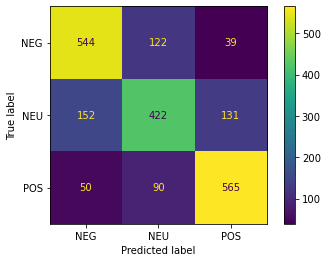

In [61]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
matrix = plot_confusion_matrix(sentiment_clf, x_test1, y_test1)